<a href="https://colab.research.google.com/github/Tulasi6031/HousePrice_Predection/blob/main/HousePrice_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD

import joblib


In [2]:
#Reading the dataset
data = pd.read_csv('/content/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [5]:
df = data

In [6]:
# Stroring the dataset without the taget feature column
X = df.drop(columns=['SalePrice'])

In [7]:
# Choose the feature to correlate with others - This is the target feature
target = df['SalePrice']

In [8]:
# Calculate the correlation matrix
# correlation_matrix = df.corr()

# Selecting only numeric columns for the correlation matrix
correlation_matrix = data.select_dtypes(include=[np.number]).corr()


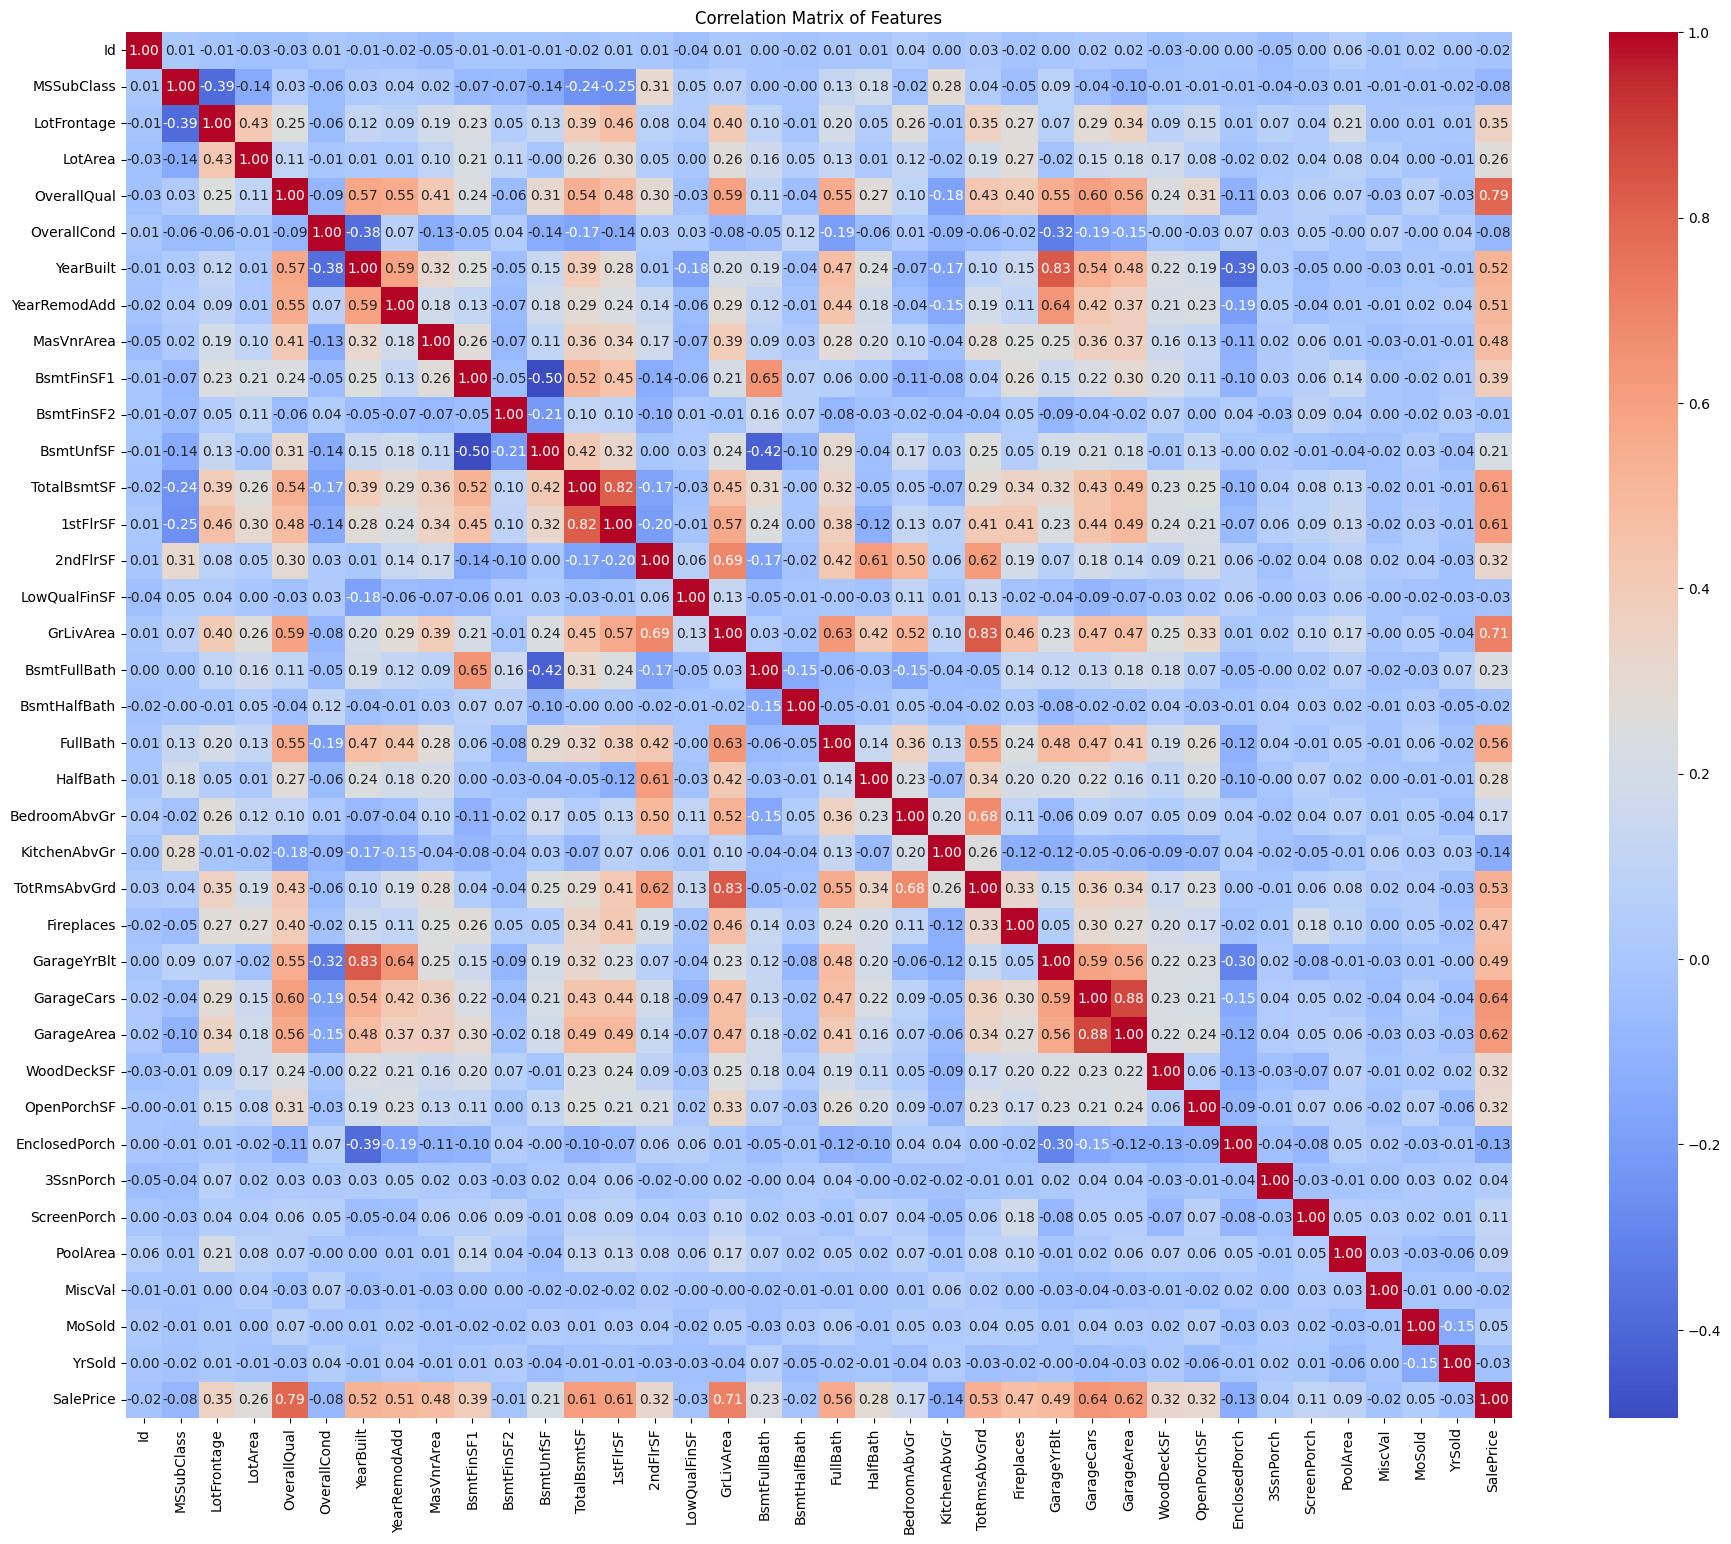

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(25, 18))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

In [10]:
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [11]:
# Seperating the categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [12]:
print(numerical_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [13]:
# Handling the numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Putting the missing numercial values with their feature mean
    ('scaler', StandardScaler())  # Scaling the numerical features for applying SVD
])

In [14]:
# Handling the categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Putting the missing categorcial values with the mode value of their feature
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Applying One-hot encode for the categorical features
])

In [15]:
# Combining both the pipelines of Categorcial and Numercial features using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

In [16]:
# Apply preprocessing and TruncatedSVD within a pipeline
svd_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svd', TruncatedSVD(n_components=35))  # Use TruncatedSVD to handle sparse input and reduce dimensions
])

In [17]:
# Fit and transform the data
X_svd = svd_pipeline.fit_transform(X)

In [18]:
# Storing the top 25 features after SVD
engg_features = X_svd

In [39]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


In [40]:
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# pip install catboost

In [41]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(engg_features, target, test_size=0.2, random_state=42)

In [42]:
X.shape

(1460, 80)

In [43]:
target.shape

(1460,)

In [44]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [45]:
# Save the preprocessing pipeline
joblib.dump(svd_pipeline, 'preprocessing_pipeline.joblib')

['preprocessing_pipeline.joblib']

In [46]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Save the Linear Regression model
joblib.dump(lr_model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [48]:
# Predictions on test set
y_pred_lr = lr_model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error

# Performance evaluation for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)  # RMSE (squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
# CatBoost Model
catboost_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=200)
catboost_model.fit(X_train, y_train)

0:	learn: 72788.7927665	total: 88.6ms	remaining: 1m 28s
200:	learn: 8761.9097694	total: 5.49s	remaining: 21.8s
400:	learn: 3864.5766836	total: 9.79s	remaining: 14.6s
600:	learn: 1861.1958426	total: 13.5s	remaining: 8.98s
800:	learn: 873.0232443	total: 18.4s	remaining: 4.57s
999:	learn: 456.5902577	total: 22s	remaining: 0us


In [51]:
# Save the CatBoost model
catboost_model.save_model('catboost_model.cbm')

In [52]:
# Predictions on test set
y_pred_catboost = catboost_model.predict(X_test)

In [53]:
# Performance evaluation for CatBoost
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)  # RMSE (squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
# Print the results
print("Linear Regression :")
print(f"Mean Absolute Error : {mae_lr:.4f}, Root Mean Square Error : {rmse_lr:.4f}")
print("CatBoost :")
print(f"Mean Absolute Error : {mae_catboost:.4f}, Root Mean Square Error : {rmse_catboost:.4f}")

Linear Regression :
Mean Absolute Error : 21172.1635, Root Mean Square Error : 35424.2861
CatBoost :
Mean Absolute Error : 18433.1253, Root Mean Square Error : 34305.0034


In [55]:
print("Preprocessor Expected Features:", preprocessor.get_feature_names_out())

Preprocessor Expected Features: ['num__Id' 'num__MSSubClass' 'num__LotFrontage' 'num__LotArea'
 'num__OverallQual' 'num__OverallCond' 'num__YearBuilt'
 'num__YearRemodAdd' 'num__MasVnrArea' 'num__BsmtFinSF1' 'num__BsmtFinSF2'
 'num__BsmtUnfSF' 'num__TotalBsmtSF' 'num__1stFlrSF' 'num__2ndFlrSF'
 'num__LowQualFinSF' 'num__GrLivArea' 'num__BsmtFullBath'
 'num__BsmtHalfBath' 'num__FullBath' 'num__HalfBath' 'num__BedroomAbvGr'
 'num__KitchenAbvGr' 'num__TotRmsAbvGrd' 'num__Fireplaces'
 'num__GarageYrBlt' 'num__GarageCars' 'num__GarageArea' 'num__WoodDeckSF'
 'num__OpenPorchSF' 'num__EnclosedPorch' 'num__3SsnPorch'
 'num__ScreenPorch' 'num__PoolArea' 'num__MiscVal' 'num__MoSold'
 'num__YrSold' 'cat__MSZoning_C (all)' 'cat__MSZoning_FV'
 'cat__MSZoning_RH' 'cat__MSZoning_RL' 'cat__MSZoning_RM'
 'cat__Street_Grvl' 'cat__Street_Pave' 'cat__Alley_Grvl' 'cat__Alley_Pave'
 'cat__LotShape_IR1' 'cat__LotShape_IR2' 'cat__LotShape_IR3'
 'cat__LotShape_Reg' 'cat__LandContour_Bnk' 'cat__LandContour_HLS'